# This notebook demonstrates the model

In [1]:
%load_ext autoreload
%autoreload 2

load the model and define the confidence values

In [4]:
from predictor import DartPredictor
from board.dartboard import DartBoard

conf = .8
resolution = 1000

board = DartBoard(resolution)
model_path = "../models/v1/best.pt"
predictor = DartPredictor(board, model_path, conf)

let the model predict the scores and visualize the result


0: 640x640 1 dartboard, 3 darts, 607.1ms
Speed: 3.8ms preprocess, 607.1ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


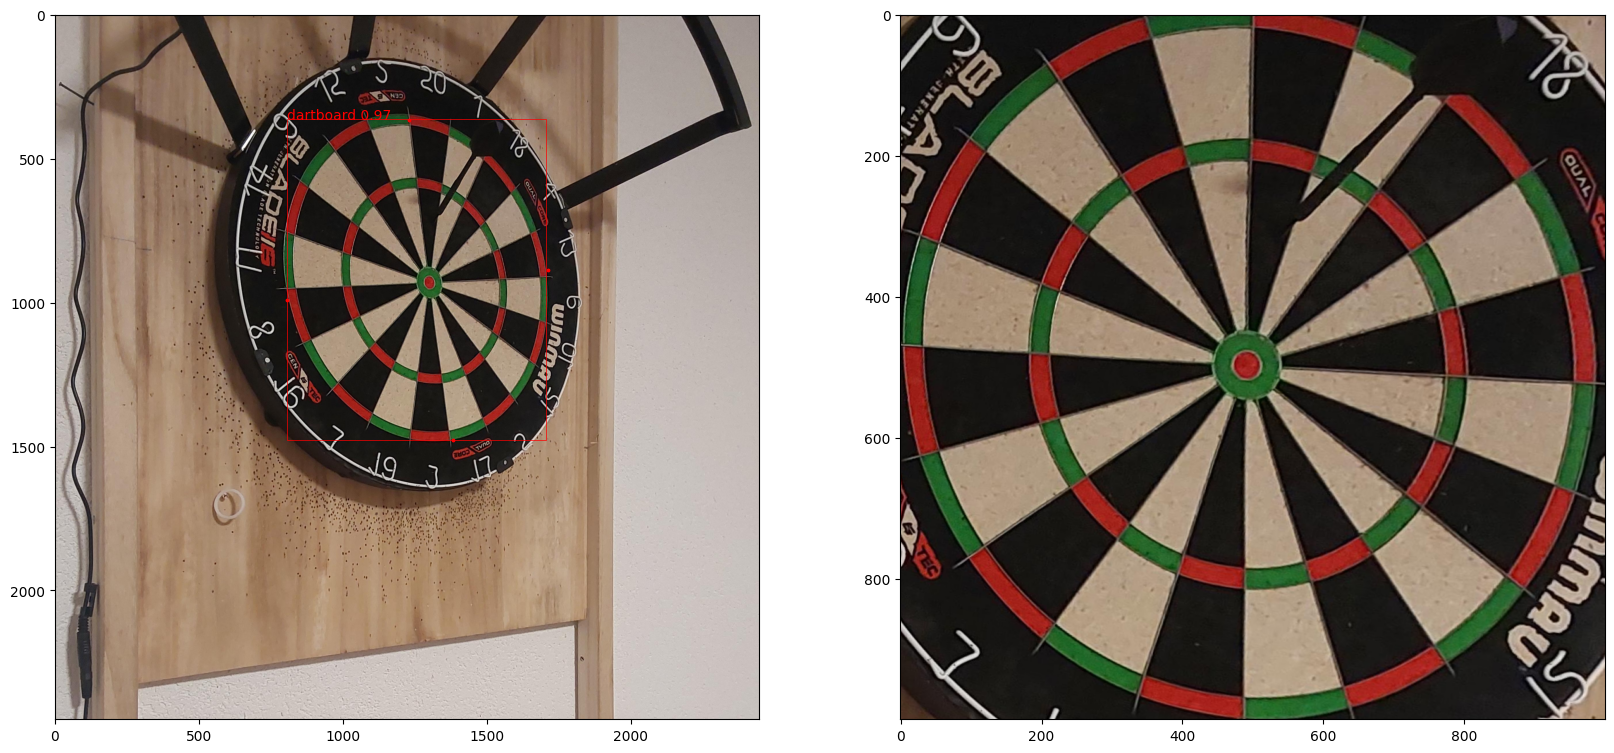

In [8]:
import cv2
from matplotlib import pyplot as plt

from perspective import warp_image
from plot import draw_bb

img_path = "../dataset/v2/dartboard_00000.jpg"

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
dart_prediction = predictor.predict(image)

warped_image = warp_image(dart_prediction.matrix, image, board.shape())

_, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(image)
for obj in dart_prediction.objects:
    draw_bb(axes[0], obj.bb, label=f"{obj.name} {obj.conf:.2f}")

    axes[0].scatter(obj.keypoints_x(), obj.keypoints_y(), c="r", s=3)



axes[1].imshow(warped_image)

for score in dart_prediction.scores:
    print(score.label)